Employee and attrition and performance

this data analysis is done by Sakshi K More

importing all the required libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from ipywidgets import interact

loading the dataset

In [80]:
data=pd.read_csv('Employee.csv')

In [81]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


small description of the dataset

 Education  1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance
1 'Bad' 2 'Good' 3 'Better' 4 'Best'

displaying the shape of the dataset

In [82]:
data.shape

(1470, 35)

displaying all the columns present in the dataset

In [83]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

mapping the'Attrition' column with 1 and 0 where  1 --> Yes and 0--> No

In [84]:
data['Attrition']=data['Attrition'].map({'Yes':1,'No':0})

In [85]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


displaying all the informaton of the data

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

checking if the data contains and null value. If yes lets drop that null value

In [87]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

lets check if the data contains any duplicated value. If yes then lets drop it

In [88]:
data.duplicated().sum()

0

displaying then description of the numerical columns of the dataset

In [89]:
data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [90]:
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


getting the value counts of the Business Travel from the data

In [13]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

this shows that there are more number of rarely travelling employees in the dataset

creating a countplot that shows the count of the employees in the dataset based on their Departments

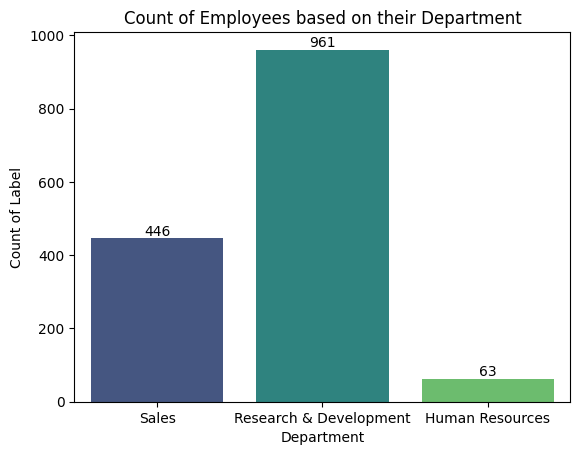

In [91]:
ax=sns.countplot(data=data,x='Department',palette='viridis')
plt.title("Count of Employees based on their Department")
plt.xlabel('Department')
plt.ylabel('Count of Label')
for bars in ax.containers:
  ax.bar_label(bars)

this shows that there are more number of employees working in the Research and Development Department and least working in HR

displaying the value count of the Education Field of the employees

In [92]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

this shows that maximum number of employees have educational field as Life Sciences and least have HR

In [93]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

creating an interactive pie chart that shows counts of employees based on different attributes selected by the user

In [94]:
@interact(x=['Education','EnvironmentSatisfaction','Gender','JobInvolvement','JobSatisfaction','PerformanceRating','WorkLifeBalance','MaritalStatus'])
def analysis(x):
  if x=='Education':
    req_data=data['Education']
  elif x=='EnvironmentSatisfaction':
    req_data=data['EnvironmentSatisfaction']
  elif x=='Gender':
    req_data=data['Gender']
  elif x=='JobInvolvement':
    req_data=data['JobInvolvement']
  elif x=='JobSatisfaction':
    req_data=data['JobSatisfaction']
  elif x=='JobSatisfaction':
    req_data=data['MaritalStatus']
  elif x=='MaritalStatus':
    req_data=data['PerformanceRating']
  elif x=='WorkLifeBalance':
    req_data=data['WorkLifeBalance']
  plt.pie(req_data.value_counts(),autopct="%1.1f%%")
  plt.title(f"Counts of Employee as per {x}")
  plt.legend(data[x],loc='upper right')
  plt.show()

interactive(children=(Dropdown(description='x', options=('Education', 'EnvironmentSatisfaction', 'Gender', 'Jo…

creating a count plot that shows the count of employees as per their salary hike

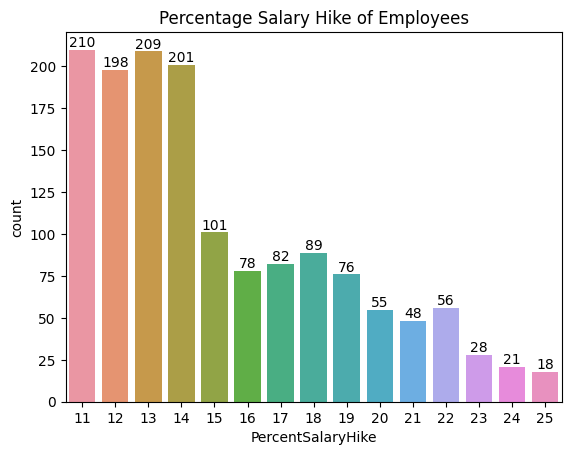

In [96]:
ax=sns.countplot(x='PercentSalaryHike',data=data)
plt.title("Percentage Salary Hike of Employees")
for bars in ax.containers:
  ax.bar_label(bars)

this shows that large number of employees have 11% salary hike

creating a new dataframe that shows the count of the employee based on their years at the company

In [36]:
df=pd.DataFrame(data['YearsAtCompany'].value_counts())
df

,YearsAtCompany
5,196
1,171
3,128
2,127
10,120
4,110
7,90
9,82
8,80
6,76


from this we can infer that maximum employees have 5 yrs at the company

checking how many employees prefer overtime

In [37]:
data['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

thsi shows that not much people prefer overtime

creating an interactive bar chart that shows the distribution of the salary of the employees based on the factors selected by the user

In [97]:
@interact(factors=['EducationField','OverTime','JobRole','YearsAtCompany','Department'])
def analysis1(factors):
  if factors=='EducationField':
    ax=data['EducationField']
    plt.bar(ax,data['MonthlyIncome'])
  elif factors=='OverTime':
    ax=data['OverTime']
    plt.bar(ax,data['MonthlyIncome'])
  elif factors=='YearsAtCompany':
    ax=data['YearsAtCompany']
    plt.bar(ax,data['MonthlyIncome'])
  elif factors=='JobRole':
    ax=data['JobRole']
    plt.bar(ax,data['MonthlyIncome'])
  elif factors=='Department':
    ax=data['Department']
    plt.bar(ax,data['MonthlyIncome'])
  plt.xlabel(f'{factors}')
  plt.xticks(rotation=45)
  plt.ylabel("Monthly Income of Employees")
  plt.title(f"Salary Distribution as per {factors}")
  plt.show()

interactive(children=(Dropdown(description='factors', options=('EducationField', 'OverTime', 'JobRole', 'Years…

MODEL CREATION

creating training and testing data. Here x is independent variables and y is dependent variable

In [99]:
x=data[['Age','MonthlyIncome','EnvironmentSatisfaction','JobSatisfaction','PercentSalaryHike','TotalWorkingYears','DistanceFromHome']]
y=data['Attrition']

splitting the data into training and testing set

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

creating a Logistic Regression Model

In [101]:
lr=LogisticRegression()

training the model with data

In [102]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

predicting the data with logistic regression model

In [103]:
prediction1=lr.predict(x_test)

checking the accuracy of the model

In [104]:
acc_score_lr=accuracy_score(y_test,prediction1)

In [105]:
print("The accuracy score of the Logistic Regression Model is : ",acc_score_lr)

The accuracy score of the Logistic Regression Model is :  0.8605442176870748


creating a gaussianNB model

In [106]:
gnb=GaussianNB()

training the model with the data

In [107]:
gnb.fit(x_train,y_train)

GaussianNB()

predicting the data with GaussianNB model

In [64]:
prediction2=gnb.predict(x_test)

checking the accuracy of the model

In [108]:
acc_score_gnb=accuracy_score(y_test,prediction2)

In [109]:
print("The accuracy score of the GaussianNB Model is : ",acc_score_gnb)

The accuracy score of the GaussianNB Model is :  0.8299319727891157


creating a decision tree model

In [110]:
dtc=DecisionTreeClassifier()

training the model with the data


In [111]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

preidcting the values with the decision tree classifier model

In [112]:
prediction3=dtc.predict(x_test)

checking the accuracy of the model

In [113]:
acc_score_dtc=accuracy_score(y_test,prediction3)

In [114]:
print("The accuracy score of the Decision Tree Classifier Model is : ",acc_score_dtc)

The accuracy score of the Decision Tree Classifier Model is :  0.7142857142857143


creating a dataframe that shows the accuracy score of the above models

In [115]:
data_dict = {
    'Name_of_Model': ['Logistic Regression', 'GaussianNB', 'Decision Tree Classifier'],
    'accuracy_of_model': [acc_score_lr, acc_score_gnb, acc_score_dtc]
}

In [116]:
report=pd.DataFrame(data_dict)
report

,Name_of_Model,accuracy_of_model
0,Logistic Regression,0.860544
1,GaussianNB,0.829932
2,Decision Tree Classifier,0.714286


from the above model we can infer that the Logistic Regression model predicts the data properly than the other models